# Goemotions Dataset

In [15]:
import pandas as pd

positive_emotions = [
    "admiration", "amusement", "approval", "caring", "curiosity", "desire",
    "excitement", "gratitude", "joy", "love", "optimism", "pride", "relief", "surprise"
]

negative_emotions = [
    "anger", "annoyance", "disappointment", "disapproval", "disgust",
    "embarrassment", "fear", "grief", "nervousness", "remorse", "sadness", "realization"
]

In [16]:
import pandas as pd

files = [
    '../data/emotions/goemotions_1.csv',
    '../data/emotions/goemotions_2.csv',
    '../data/emotions/goemotions_3.csv',
]

dfs = [pd.read_csv(f) for f in files]

df = pd.concat(dfs, ignore_index=True)

df_positive_train = df[df[positive_emotions].sum(axis=1) > 0].copy()
df_negative_train = df[df[negative_emotions].sum(axis=1) > 0].copy()

df_train_positive = df_positive_train[["text"] + positive_emotions].reset_index(drop=True)
df_train_negative = df_negative_train[["text"] + negative_emotions].reset_index(drop=True)

print(df_train_positive.head())
print(df_train_negative.head())

# Print positive and negative emotion columns
print("Positive emotions columns:", df_train_positive.columns.tolist())
print("Negative emotions columns:", df_train_negative.columns.tolist())


df_train_positive.to_csv('../data/raw/goemotions_train_positive.csv', index=False)
df_train_negative.to_csv('../data/raw/goemotions_train_negative.csv', index=False)


                                                text  admiration  amusement  \
0                                 Man I love reddit.           0          0   
1  Right? Considering it’s such an important docu...           0          0   
2  That's crazy; I went to a super [RELIGION] hig...           0          1   
3                                that's adorable asf           0          1   
4  "Sponge Blurb Pubs Quaw Haha GURR ha AAa!" fin...           0          1   

   approval  caring  curiosity  desire  excitement  gratitude  joy  love  \
0         0       0          0       0           0          0    0     1   
1         0       0          0       0           0          1    0     0   
2         0       0          0       0           0          0    0     0   
3         0       0          0       0           0          0    0     0   
4         0       0          0       0           0          0    0     0   

   optimism  pride  relief  surprise  
0         0      0       0   

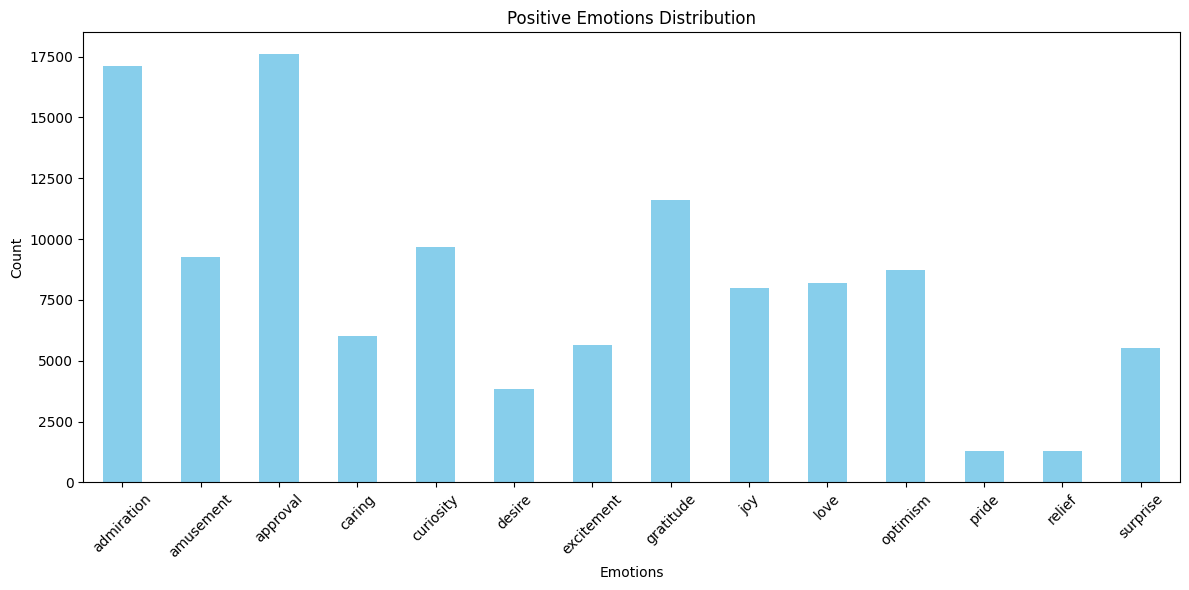

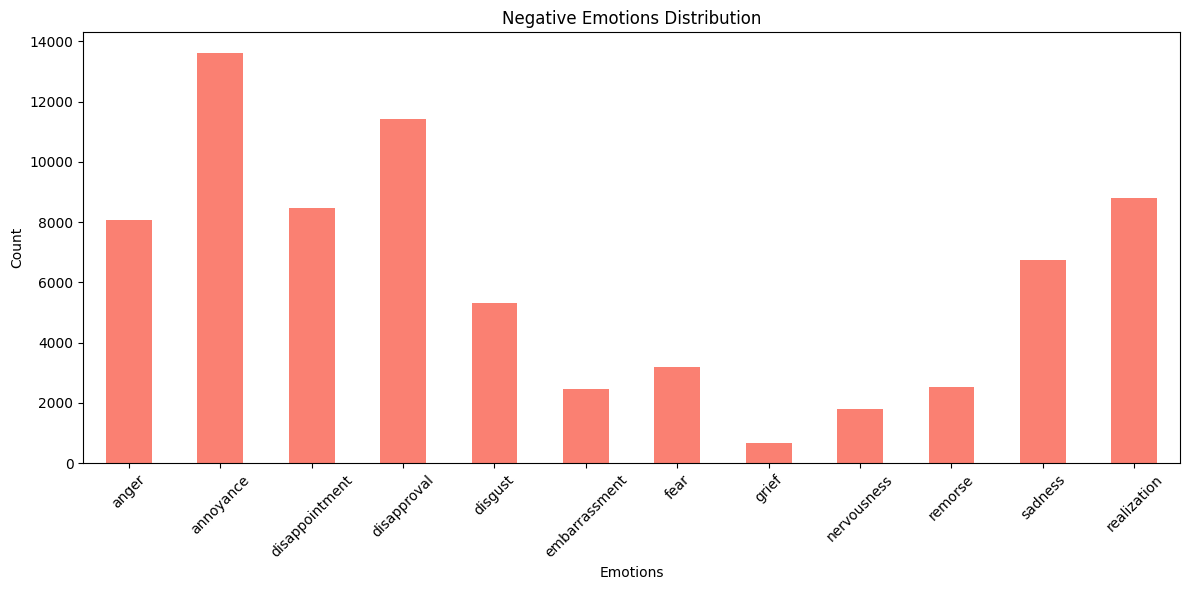

In [17]:
# Matplotlib de emociones positivas y negativas

import matplotlib.pyplot as plt

# Count the number of instances for each emotion
positive_counts = df_train_positive[positive_emotions].sum()
negative_counts = df_train_negative[negative_emotions].sum()

# Plotting positive emotions
plt.figure(figsize=(12, 6))
positive_counts.plot(kind='bar', color='skyblue')
plt.title('Positive Emotions Distribution')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting negative emotions
plt.figure(figsize=(12, 6))
negative_counts.plot(kind='bar', color='salmon')
plt.title('Negative Emotions Distribution')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()